In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [18]:
neural_network = cv2.dnn.readNet("assets\\neural-network\\yolov3.weights" , "assets\\neural-network\\yolov3.cfg")

In [19]:
classes = []

with open("assets\\neural-network\\coco.names" , 'r') as file:
    classes = file.read().splitlines()
    
    
print(len(classes))

print(classes)





80
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [20]:
image = cv2.imread("assets\\images\\00000002.jpg")

blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , (0,0,0) , swapRB = True , crop = False)


In [21]:
blob.shape

(1, 3, 320, 320)

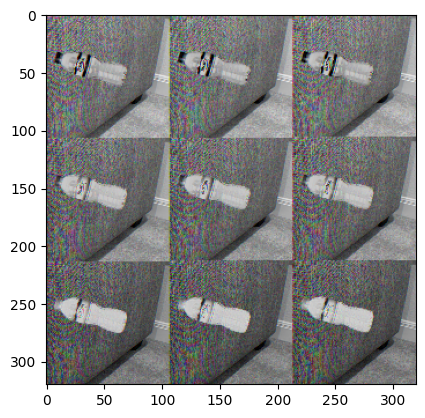

In [22]:
i = blob[0].reshape(320,320,3)

plt.imshow(i)

In [23]:
neural_network.setInput(blob)

In [24]:
output_layers_name = neural_network.getUnconnectedOutLayersNames()

layeroutput = neural_network.forward(output_layers_name)

In [25]:
boxes = []
confidences = []
class_ids = []

height = image.shape[0]
width = image.shape[1]

In [26]:
for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        
        if(confidence > 0.7):
            centre_x = int(detection[0]*width)
            centre_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
            
            x = int(centre_x- w/2)
            y = int(centre_y- h/2)


            boxes.append((x,y,w,h))
            confidences.append(float(confidence))
            class_ids.append(class_id)            

In [27]:
print(len(boxes))

1


In [28]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences , 0.5 , 0.4)

In [29]:
font = cv2.FONT_HERSHEY_PLAIN

colors = np.random.uniform(0 , 255 , size = (len(boxes) , 3))


In [30]:
for i in indexes.flatten():
    x , y , w , h = boxes[i]
    label = str(classes[class_ids[i]])
    confi = str(round(confidences[i] , 2))
    color = colors[i]
    
    cv2.rectangle(image , (x,y) , (x+w,y+h) , color , 2)
    
    cv2.putText(image , label+" "+confi , (x,y+20) , font , 2 , (255,255,255) , 2)

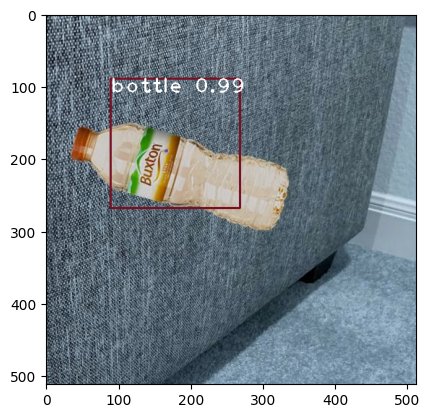

In [31]:
plt.imshow(image)

2


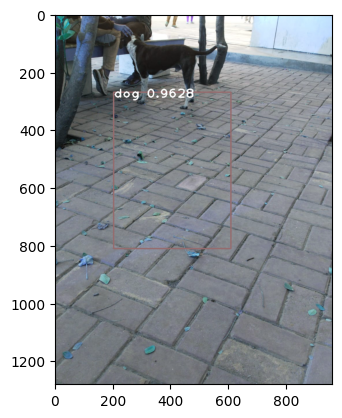

In [42]:
image = cv2.imread("assets\\images\\dog.jpeg")

blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , (0,0,0) , swapRB = True , crop = False)

blob.shape

i = blob[0].reshape(320,320,3)

plt.imshow(i)

neural_network.setInput(blob)

output_layers_name = neural_network.getUnconnectedOutLayersNames()

layeroutput = neural_network.forward(output_layers_name)


boxes = []
confidences = [] 
class_ids = []

height = image.shape[0]
width = image.shape[1]



for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        
        if(confidence > 0.7):
            centre_x = int(detection[0]*width)
            centre_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
            
            x = int(centre_x- w/2)
            y = int(centre_y- h/2)


            boxes.append((x,y,w,h))
            confidences.append(float(confidence))
            class_ids.append(class_id)     
            
            
print(len(boxes))

if(len(boxes) > 0):

    indexes = cv2.dnn.NMSBoxes(boxes,confidences , 0.5 , 0.4)

    font = cv2.FONT_HERSHEY_PLAIN

    colors = np.random.uniform(0 , 255 , size = (len(boxes) , 3))

    for i in indexes.flatten():
        x , y , w , h = boxes[i]
        label = str(classes[class_ids[i]])
        confi = str(round(confidences[i] , 4))
        color = colors[i]
        
        cv2.rectangle(image , (x,y) , (x+w,y+h) , color , 4)
        
        cv2.putText(image , label+" "+confi , (x,y+20) , font , 3 , (255,255,255) , 4)
        
    plt.imshow(image)